Load Data from Google Drive

In [950]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [951]:
!ls "/content/gdrive/MyDrive/Regression"

data.csv  Regression.ipynb


Import Library and get Data

In [952]:
import pandas as pd
import numpy as np

In [953]:
data = pd.read_csv('/content/gdrive/MyDrive/Regression/data.csv')

In [954]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [955]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Hence their are no nullable value in the data set

EDA

In [956]:
import matplotlib.pyplot as plt
import seaborn as sns

In [957]:
sns.set()

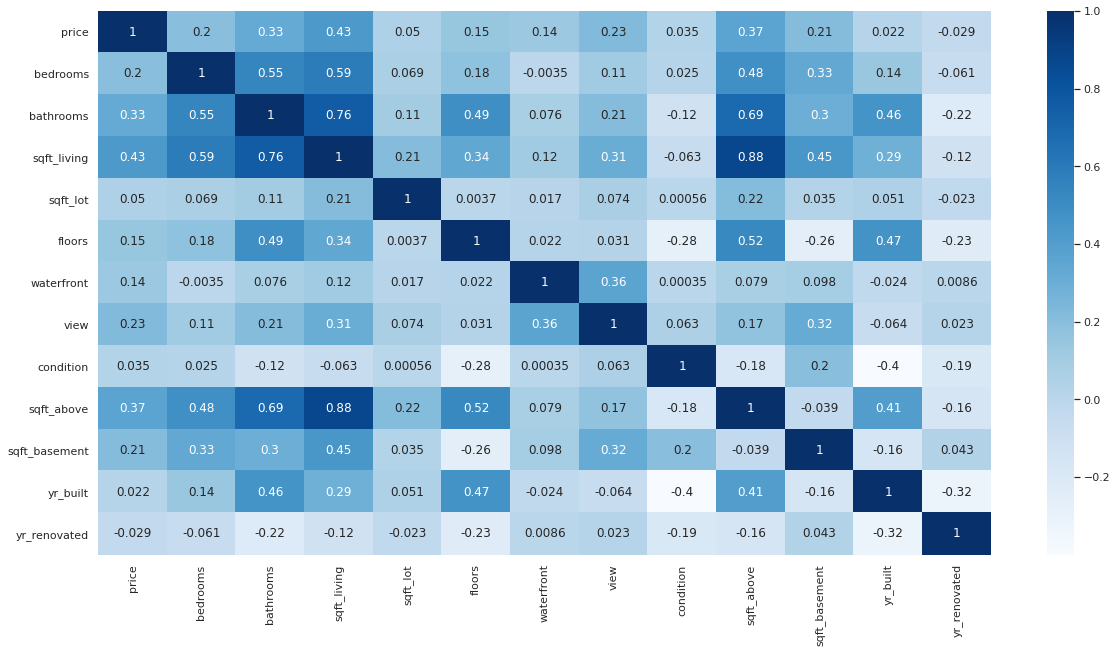

In [958]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

`sqft_living` is higly correlated to `sqft_above`, and `sqft_living` and `bathrooms` as well

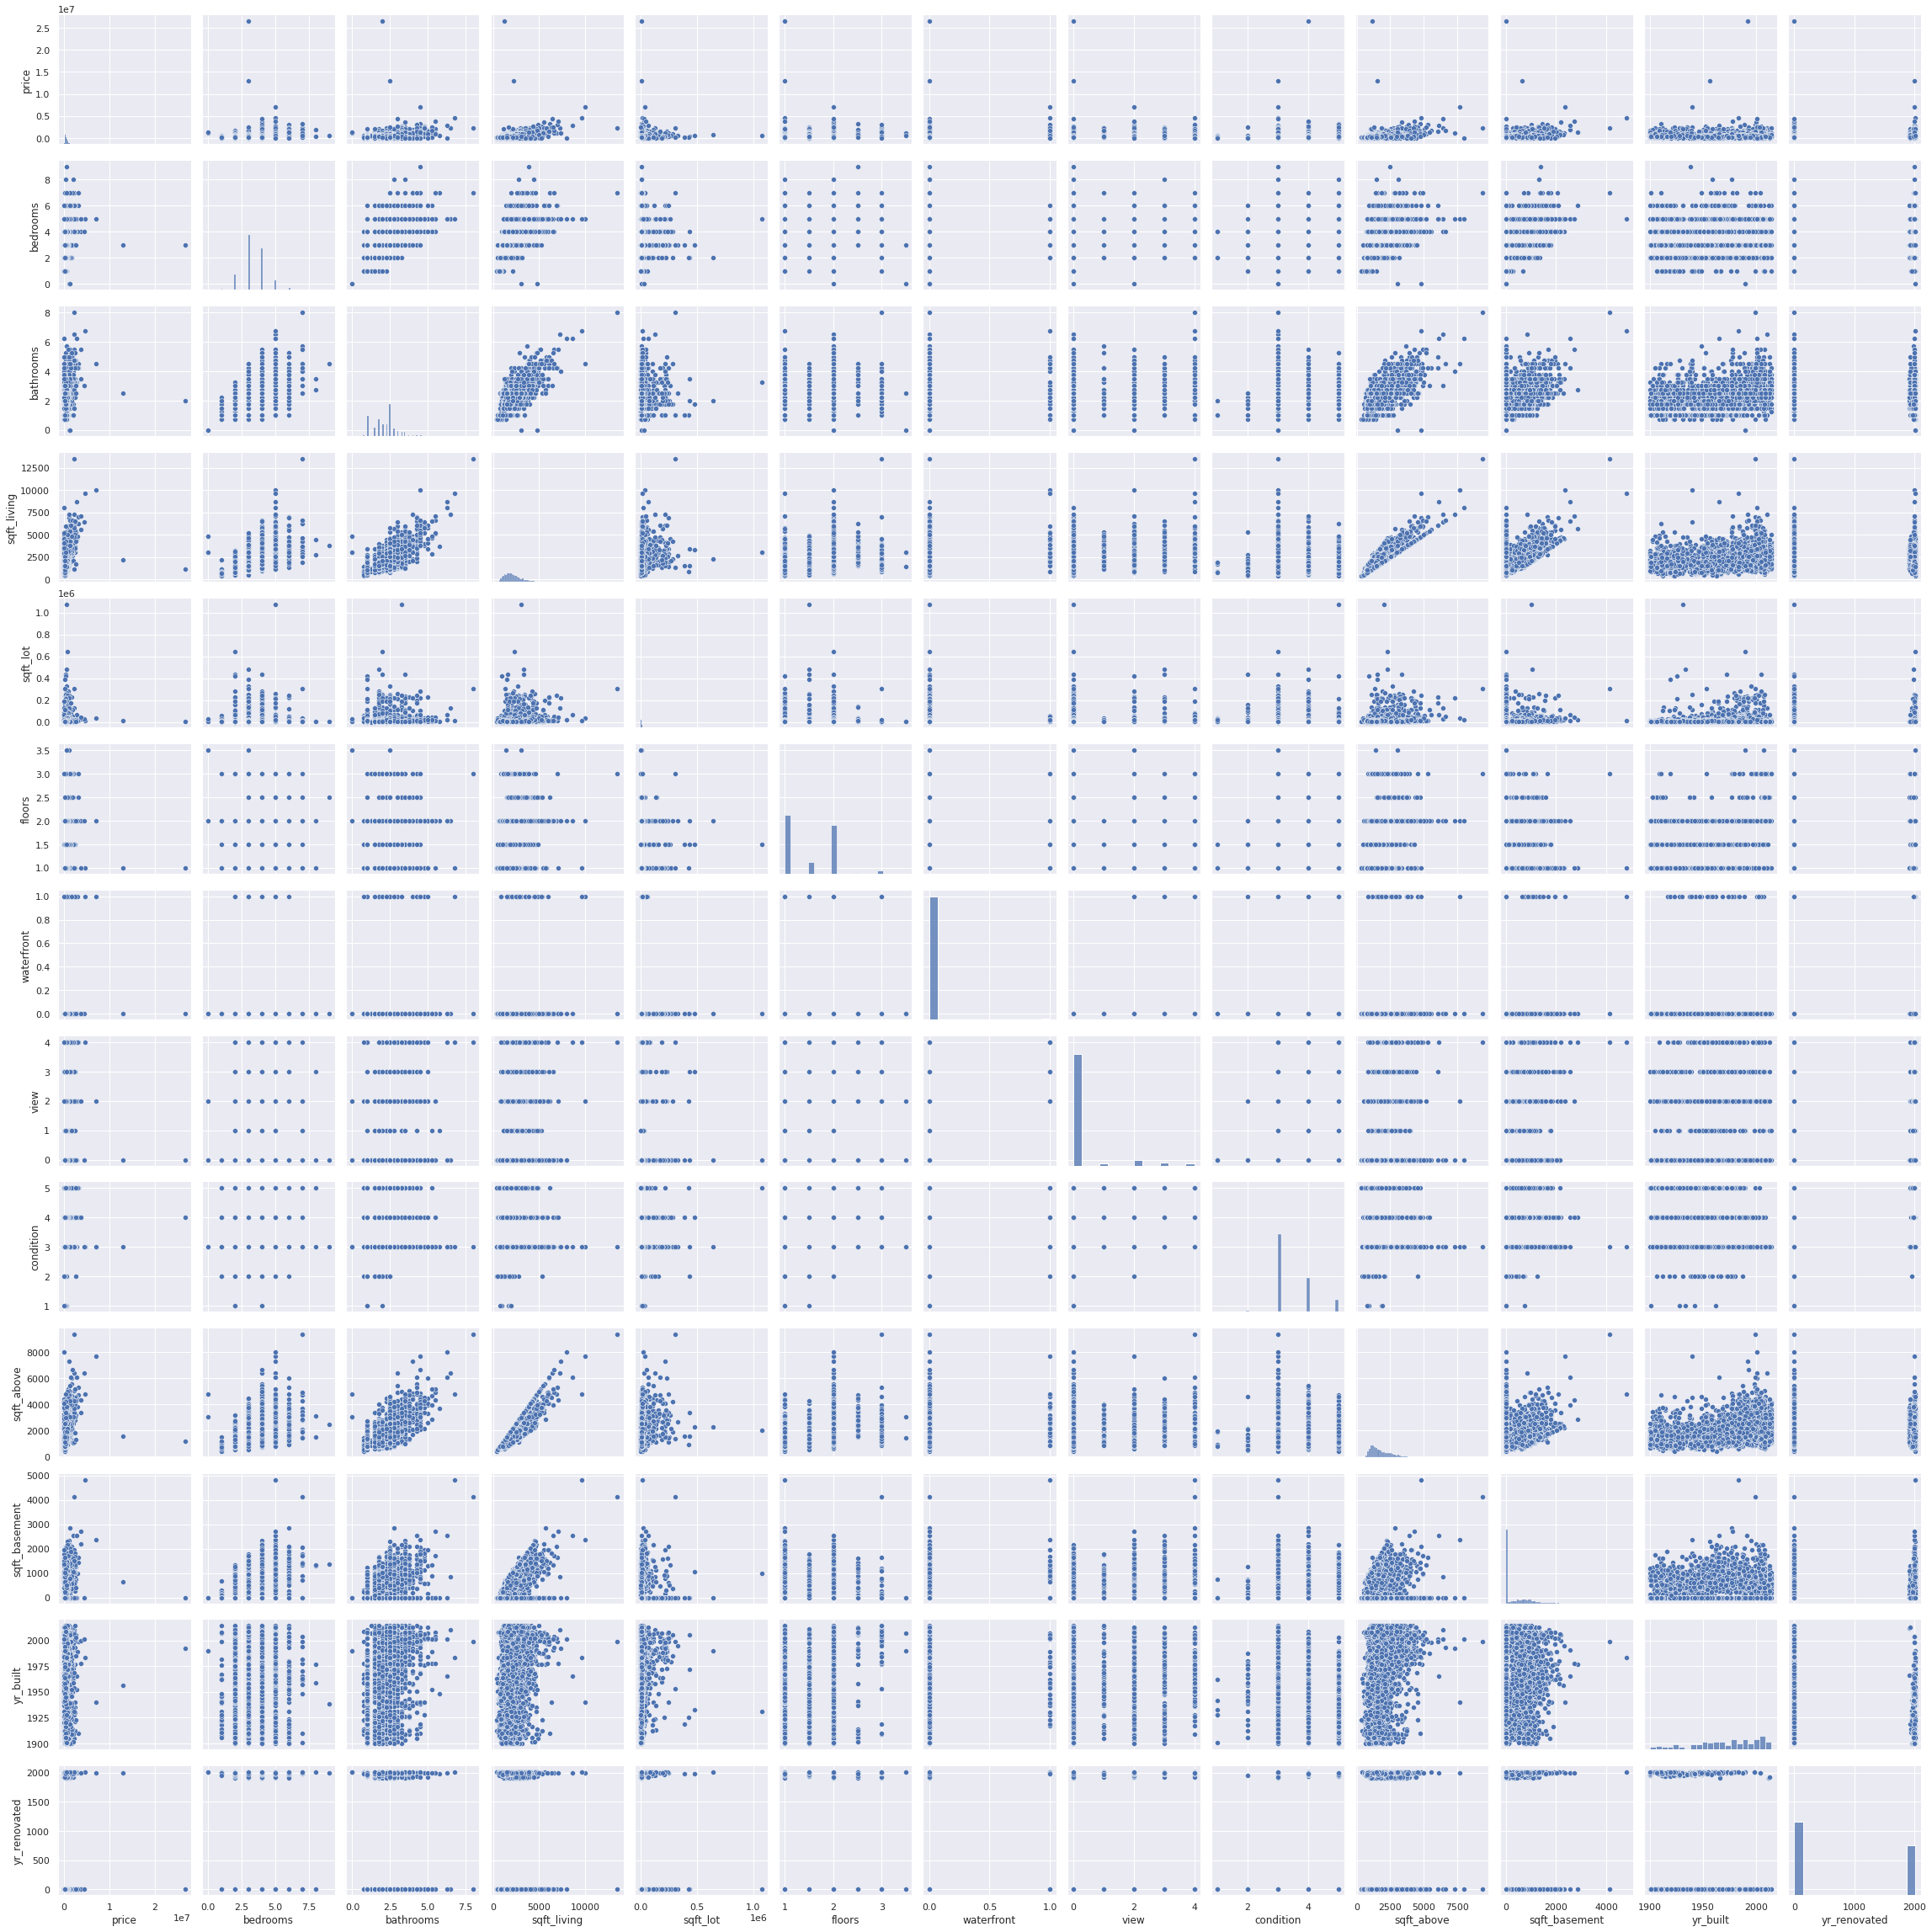

In [959]:
sns.pairplot(data)
plt.show()

Pair Plot also give that `sqft_above` is highly correlated to `sqft_living` and `sqft_living` and `bathrooms` as well.

Lets drop one common columns `sqft_living` and try other calculations.

In [960]:
data.drop(['sqft_living'],axis = 1,inplace=True)

Let's once again try heat map

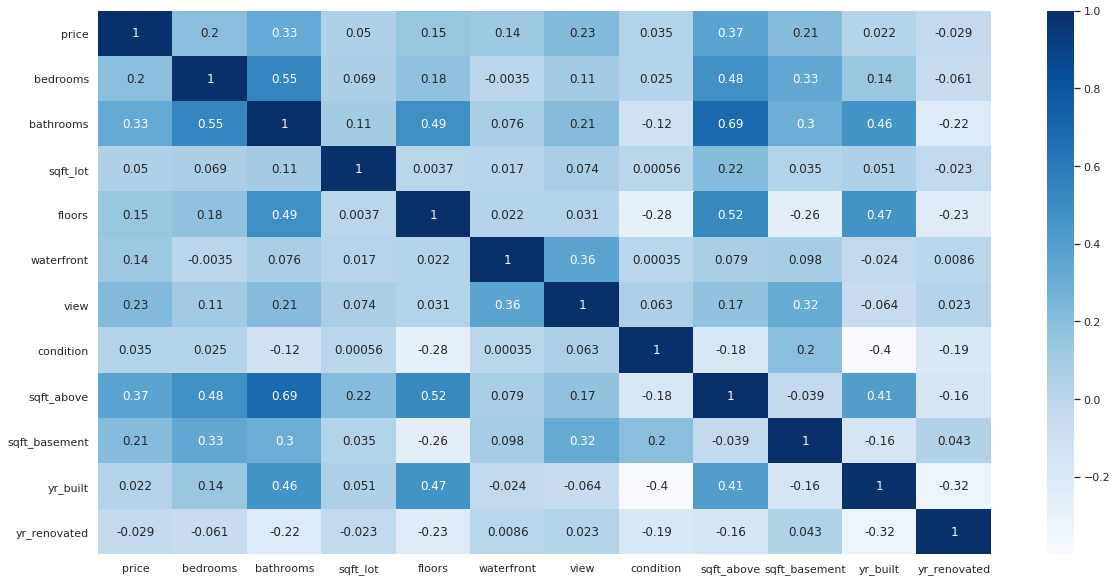

In [961]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

Let's take out X and y from the data

In [962]:
data.country.value_counts()

USA    4600
Name: country, dtype: int64

Country is constant so we can remove it obviously

In [963]:
data.drop('country',axis = 1,inplace=True)

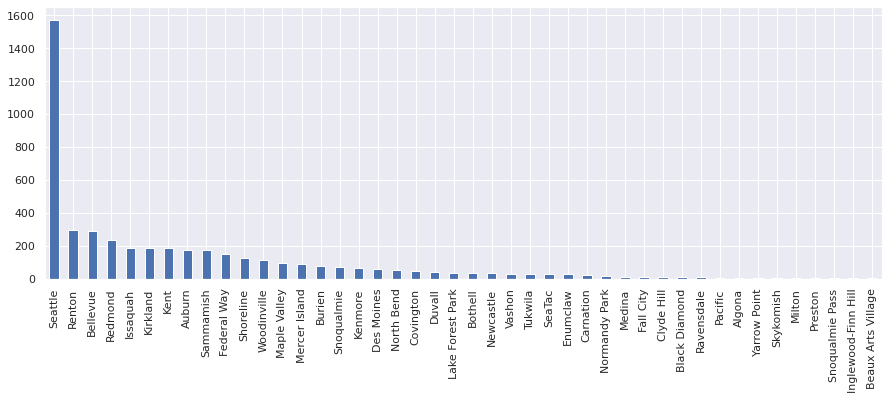

In [964]:
plt.figure(figsize=(15,5))
data.city.value_counts().plot.bar()
plt.show()

Well seeing the city columns our majority of data is of `Seattle`. Since this data is majorily comprise of `Seattle` lets only create a model which focus only on this city.

In [965]:
Seattle = data[data['city'] == 'Seattle']

In [966]:
Seattle

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
5,2014-05-02 00:00:00,4.900000e+05,2.0,1.00,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115
9,2014-05-02 00:00:00,6.400000e+05,4.0,2.00,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115
11,2014-05-02 00:00:00,1.400000e+06,4.0,2.50,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105
13,2014-05-02 00:00:00,3.650000e+05,3.0,1.00,6435,1.0,0,0,4,1090,0,1955,2009,2504 SW Portland Ct,Seattle,WA 98106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4582,2014-07-07 00:00:00,4.060625e+05,2.0,1.00,4650,1.0,0,0,4,1290,0,1906,1990,312 NE 81st St,Seattle,WA 98115
4585,2014-07-07 00:00:00,4.868950e+05,3.0,1.00,3330,1.5,0,0,4,1390,500,1901,0,4324 Dayton Ave N,Seattle,WA 98103
4591,2014-07-08 00:00:00,3.961667e+05,3.0,1.75,5752,1.0,0,0,4,940,940,1945,0,3529 SW Webster St,Seattle,WA 98126
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133


In [967]:
Seattle.drop('city',axis = 1,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


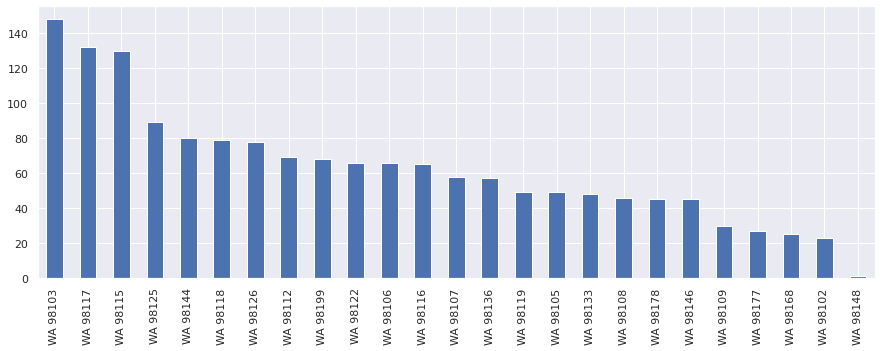

In [968]:
plt.figure(figsize=(15,5))
Seattle.statezip.value_counts().plot.bar()

statezip seems to be in good shape so we can label them, let just check street then we are good to go.

In [969]:
Seattle.street.value_counts().head(20)

8354 11th Ave NW           2
5968 44th Ave S            2
9413 34th Ave SW           2
8216 Linden Ave N          2
12303 Sand Point Way NE    2
2803 SW Bataan St          2
2050 14th Ave W            2
5010 Greenwood Ave N       2
11716 16th Ave NE          2
323 25th Ave S             2
8430 8th Ave SW            2
615 NW 92nd St             2
1018 NE 96th St            2
353 N 105th St             2
6008 8th Ave NE            2
4507 Linden Ave N          2
2739 31st Ave S            2
2008 Yale Ave E            2
513 N 46th St              2
3510 S Holly St            2
Name: street, dtype: int64

Mostly data are unqiue in nature few are getting doubled we can ingnore for our analysis

Lets perform label encoding for `statezip` and drop `street` column and `date` coloumn.

In [970]:
Seattle.date.sort_values(ascending=False)

4598    2014-07-10 00:00:00
4301    2014-07-10 00:00:00
4297    2014-07-10 00:00:00
4295    2014-07-10 00:00:00
4292    2014-07-10 00:00:00
               ...         
48      2014-05-02 00:00:00
52      2014-05-02 00:00:00
58      2014-05-02 00:00:00
59      2014-05-02 00:00:00
1       2014-05-02 00:00:00
Name: date, Length: 1573, dtype: object

`date` column shows that this data is of `2014` year data.

In [971]:
Seattle.drop(['street','date'],axis = 1,inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [972]:
Seattle.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
1,2384000.0,5.0,2.5,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
5,490000.0,2.0,1.0,6380,1.0,0,0,3,880,0,1938,1994,WA 98115
9,640000.0,4.0,2.0,6200,1.5,0,0,3,1520,0,1945,2010,WA 98115
11,1400000.0,4.0,2.5,4000,1.5,0,0,5,1910,1010,1909,1988,WA 98105
13,365000.0,3.0,1.0,6435,1.0,0,0,4,1090,0,1955,2009,WA 98106


In [973]:
from sklearn.preprocessing import LabelEncoder

In [974]:
le = LabelEncoder()
Seattle['statezip'] = le.fit_transform(Seattle['statezip'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [975]:
Seattle.waterfront.value_counts()

0    1569
1       4
Name: waterfront, dtype: int64

Lets remove waterfront as its seems baised towards 0 only

In [976]:
Seattle.drop('waterfront', axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [977]:
Seattle.view.value_counts()

0    1373
2      97
3      48
1      30
4      25
Name: view, dtype: int64

Let's keep an eye on this feature `view`. Since its not completely biased to 0

I think we are good to divide the `Seattle` data to X and y, the moment we are waiting for.

In [978]:
X = Seattle.drop('price',axis = 1)
y = Seattle['price']

In [979]:
X

,bedrooms,bathrooms,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
1,5.0,2.50,9050,2.0,4,5,3370,280,1921,0,12
5,2.0,1.00,6380,1.0,0,3,880,0,1938,1994,8
9,4.0,2.00,6200,1.5,0,3,1520,0,1945,2010,8
11,4.0,2.50,4000,1.5,0,5,1910,1010,1909,1988,2
13,3.0,1.00,6435,1.0,0,4,1090,0,1955,2009,3
...,...,...,...,...,...,...,...,...,...,...,...
4582,2.0,1.00,4650,1.0,0,4,1290,0,1906,1990,8
4585,3.0,1.00,3330,1.5,0,4,1390,500,1901,0,1
4591,3.0,1.75,5752,1.0,0,4,940,940,1945,0,15
4595,3.0,1.75,6360,1.0,0,4,1510,0,1954,1979,16


In [980]:
y

1       2.384000e+06
5       4.900000e+05
9       6.400000e+05
11      1.400000e+06
13      3.650000e+05
            ...     
4582    4.060625e+05
4585    4.868950e+05
4591    3.961667e+05
4595    3.081667e+05
4598    2.034000e+05
Name: price, Length: 1573, dtype: float64

let's split up the data

In [981]:
from sklearn.model_selection import train_test_split

In [982]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state= 42)

Let's do feature scaling since some of our coloumns in thousands and some are even only single digit. So we need to scale for Linear Regresssion at least.

In [983]:
from sklearn.preprocessing import StandardScaler

In [984]:
ss = StandardScaler()
X_train_scale = ss.fit_transform(X_train)
X_test_scale = ss.transform(X_test)

Let's choose various model and choose best one of them.

Part A

In [985]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

Let's try with default model then will tune them.

In [986]:
linearRegression = LinearRegression()
svr = SVR()
decisionTreeRegressor = DecisionTreeRegressor()
randomForestRegressor = RandomForestRegressor()
xGBRegressor = XGBRegressor()

In [987]:
linearRegression.fit(X_train_scale,y_train)
svr.fit(X_train_scale,y_train)
decisionTreeRegressor.fit(X_train_scale,y_train) 
randomForestRegressor.fit(X_train_scale,y_train)
xGBRegressor.fit(X_train_scale,y_train)

[17:04:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Let's do some feature selection here as well.

In [988]:
dimp_feature = pd.Series(decisionTreeRegressor.feature_importances_)
rimp_feature = pd.Series(randomForestRegressor.feature_importances_)
dimp_feature.index = X_train.columns
rimp_feature.index = X_train.columns
dimp_feature.sort_values(ascending=False,inplace=True)
rimp_feature.sort_values(ascending=False,inplace=True)

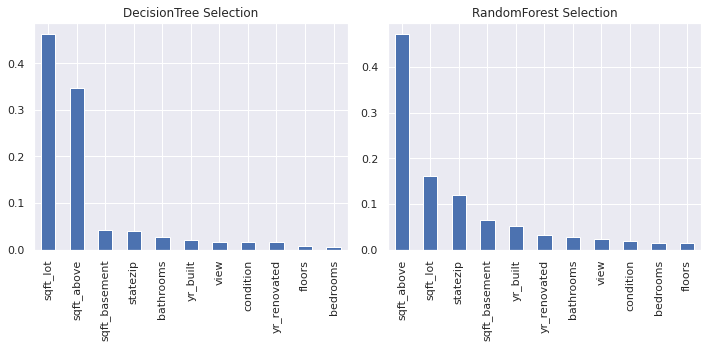

In [989]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('DecisionTree Selection')
dimp_feature.plot.bar()
plt.subplot(1,2,2)
plt.title('RandomForest Selection')
rimp_feature.plot.bar()
plt.tight_layout()

In [990]:
y_pred_linearRegression = linearRegression.predict(X_test_scale)
y_pred_svr = svr.predict(X_test_scale)
y_pred_decisionTreeRegressor = decisionTreeRegressor.predict(X_test_scale)
y_pred_randomForestRegressor = randomForestRegressor.predict(X_test_scale)
y_pred_xGBRegressor = xGBRegressor.predict(X_test_scale)

In [991]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [992]:
rscore_linearRegression = r2_score(y_test,y_pred_linearRegression)
rscore_svr = r2_score(y_test,y_pred_svr)
rscore_decisionTreeRegressor = r2_score(y_test,y_pred_decisionTreeRegressor)
rscore_randomForestRegressor = r2_score(y_test,y_pred_randomForestRegressor)
rscore_xGBRegressor = r2_score(y_test,y_pred_xGBRegressor)

In [993]:
msescore_linearRegression = mean_squared_error(y_test,y_pred_linearRegression)
msescore_svr = mean_squared_error(y_test,y_pred_svr)
msescore_decisionTreeRegressor = mean_squared_error(y_test,y_pred_decisionTreeRegressor)
msescore_randomForestRegressor = mean_squared_error(y_test,y_pred_randomForestRegressor)
msescore_xGBRegressor = mean_squared_error(y_test,y_pred_xGBRegressor)

In [994]:
maescore_linearRegression = mean_absolute_error(y_test,y_pred_linearRegression)
maescore_svr = mean_absolute_error(y_test,y_pred_svr)
maescore_decisionTreeRegressor = mean_absolute_error(y_test,y_pred_decisionTreeRegressor)
maescore_randomForestRegressor = mean_absolute_error(y_test,y_pred_randomForestRegressor)
maescore_xGBRegressor = mean_absolute_error(y_test,y_pred_xGBRegressor)

In [995]:
print('R2 Linear Regression: {}'.format(rscore_linearRegression))
print('R2 SVR: {}'.format(rscore_svr))
print('R2 DecisionTreeRegressor: {}'.format(rscore_decisionTreeRegressor))
print('R2 RandomForestRegressor: {}'.format(rscore_randomForestRegressor))
print('R2 XGBRegressor: {}'.format(rscore_xGBRegressor))

R2 Linear Regression: 0.6163080380952206
R2 SVR: -0.090934612298462
R2 DecisionTreeRegressor: 0.2584502724720785
R2 RandomForestRegressor: 0.5922548681956838
R2 XGBRegressor: 0.5709253952818353


In [996]:
print('MSE Linear Regression: {}'.format(msescore_linearRegression))
print('MSE SVR: {}'.format(msescore_svr))
print('MSE DecisionTreeRegressor: {}'.format(msescore_decisionTreeRegressor))
print('MSE RandomForestRegressor: {}'.format(msescore_randomForestRegressor))
print('MSE XGBRegressor: {}'.format(msescore_xGBRegressor))

MSE Linear Regression: 36302192408.42437
MSE SVR: 103216439573.20363
MSE DecisionTreeRegressor: 70160137719.57506
MSE RandomForestRegressor: 38577931512.7588
MSE XGBRegressor: 40595973865.91335


In [997]:
print('MAE Linear Regression: {}'.format(maescore_linearRegression))
print('MAE SVR: {}'.format(maescore_svr))
print('MAE DecisionTreeRegressor: {}'.format(maescore_decisionTreeRegressor))
print('MAE RandomForestRegressor: {}'.format(maescore_randomForestRegressor))
print('MAE XGBRegressor: {}'.format(maescore_xGBRegressor))

MAE Linear Regression: 135424.74864636725
MAE SVR: 216303.58977897474
MAE DecisionTreeRegressor: 180280.74678217797
MAE RandomForestRegressor: 123273.49830584637
MAE XGBRegressor: 124066.90966919067


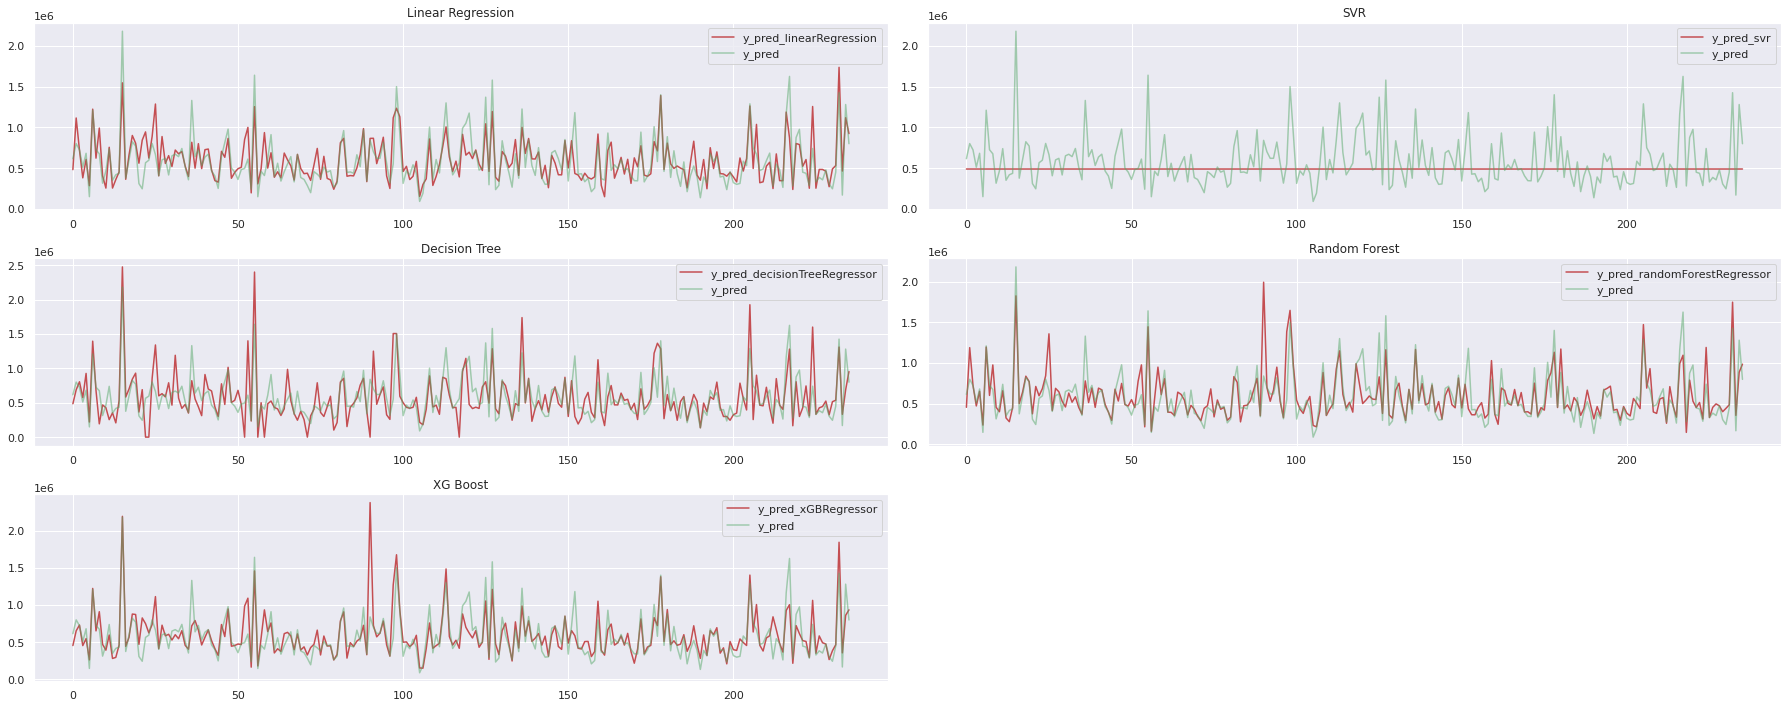

In [998]:
plt.figure(figsize=(25,10))

plt.subplot(3,2,1)
plt.plot(range(0,len(y_pred_linearRegression)),y_pred_linearRegression,c='r')
plt.plot(range(0,len(y_test)),y_test,c='g',alpha=0.5)
plt.title('Linear Regression')
plt.legend(['y_pred_linearRegression','y_pred'])

plt.subplot(3,2,2)
plt.plot(range(0,len(y_pred_svr)),y_pred_svr,c='r')
plt.plot(range(0,len(y_test)),y_test,c='g',alpha=0.5)
plt.title('SVR')
plt.legend(['y_pred_svr','y_pred'])

plt.subplot(3,2,3)
plt.plot(range(0,len(y_pred_decisionTreeRegressor)),y_pred_decisionTreeRegressor,c='r')
plt.plot(range(0,len(y_test)),y_test,c='g',alpha=0.5)
plt.title('Decision Tree')
plt.legend(['y_pred_decisionTreeRegressor','y_pred'])

plt.subplot(3,2,4)
plt.plot(range(0,len(y_pred_randomForestRegressor)),y_pred_randomForestRegressor,c='r')
plt.plot(range(0,len(y_test)),y_test,c='g',alpha=0.5)
plt.title('Random Forest')
plt.legend(['y_pred_randomForestRegressor','y_pred'])

plt.subplot(3,2,5)
plt.plot(range(0,len(y_pred_xGBRegressor)),y_pred_xGBRegressor,c='r')
plt.plot(range(0,len(y_test)),y_test,c='g',alpha=0.5)
plt.title('XG Boost')
plt.legend(['y_pred_xGBRegressor','y_pred'])

plt.tight_layout()

Part B

Let's do more feature engineering and find out the outcome whether we can have improve model or not?

In [999]:
Seattle

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
1,2.384000e+06,5.0,2.50,9050,2.0,4,5,3370,280,1921,0,12
5,4.900000e+05,2.0,1.00,6380,1.0,0,3,880,0,1938,1994,8
9,6.400000e+05,4.0,2.00,6200,1.5,0,3,1520,0,1945,2010,8
11,1.400000e+06,4.0,2.50,4000,1.5,0,5,1910,1010,1909,1988,2
13,3.650000e+05,3.0,1.00,6435,1.0,0,4,1090,0,1955,2009,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4582,4.060625e+05,2.0,1.00,4650,1.0,0,4,1290,0,1906,1990,8
4585,4.868950e+05,3.0,1.00,3330,1.5,0,4,1390,500,1901,0,1
4591,3.961667e+05,3.0,1.75,5752,1.0,0,4,940,940,1945,0,15
4595,3.081667e+05,3.0,1.75,6360,1.0,0,4,1510,0,1954,1979,16


We know 1 thing this data is of 2014 year let's convert the `yr_built` and `yr_renovated` column to difference with current year.

In [1000]:
Seattle['yr_built'] = 2014 - Seattle['yr_built']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1001]:
Seattle['yr_renovated'] = Seattle['yr_renovated'].apply(lambda x: 0 if (x == 0) else 2014 - x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1002]:
Seattle.head()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
1,2384000.0,5.0,2.5,9050,2.0,4,5,3370,280,93,0,12
5,490000.0,2.0,1.0,6380,1.0,0,3,880,0,76,20,8
9,640000.0,4.0,2.0,6200,1.5,0,3,1520,0,69,4,8
11,1400000.0,4.0,2.5,4000,1.5,0,5,1910,1010,105,26,2
13,365000.0,3.0,1.0,6435,1.0,0,4,1090,0,59,5,3


Let's give a correlation check once more

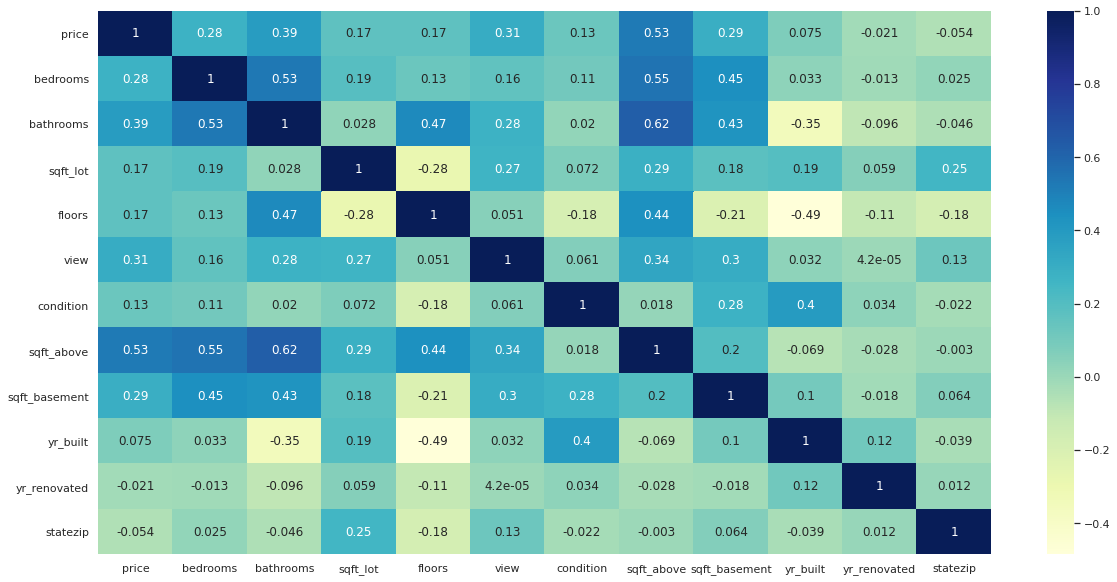

In [1003]:
plt.figure(figsize=(20,10))
sns.heatmap(Seattle.corr(),annot=True,cmap='YlGnBu')
plt.show()

Let's check p-value for the columns for linear regression

In [1004]:
import statsmodels.api as sm

In [1005]:
X = Seattle.drop('price',axis = 1)
y = Seattle['price']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     75.78
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.61e-136
Time:                        17:04:12   Log-Likelihood:                -22415.
No. Observations:                1573   AIC:                         4.485e+04
Df Residuals:                    1561   BIC:                         4.492e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.515e+04   6.93e+04     -0.941      0.347   -2.01e+05    7.07e+04
bedrooms      -6.199e+04   1.28e+04     -4.840      0.000   -8.71e+04   -3.69e+04
bathrooms      4.764e+04   2.02e+04      2.363      0.018    8100.868    8.72e+04
sqft_lot         -1.4907      2.833     -0.526      0.599      -7.048       4.067
floors         4471.6785   2.46e+04      0.182      0.856   -4.38e+04    5.28e+04
view           5.041e+04   1.28e+04      3.941      0.000    2.53e+04    7.55e+04
condition       2.48e+04   1.43e+04      1.730      0.084   -3321.033    5.29e+04
sqft_above      369.9237     25.569     14.467      0.000     319.770     420.078
sqft_basement   183.1981     30.134      6.079      0.000     124.091     242.305
yr_built       1466.5734    368.278      3.982      0.000     744.202    2188.945
yr_renovated   -259.5754    555.819     -0.467      0.641   -1349.805     830.654
statezip      -4095.0835   1504.971     -2.721      0.007   -7047.061   -1143.106
==============================================================================
Omnibus:                     3732.867   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36525382.110
Skew:                          22.745   Prob(JB):                         0.00
Kurtosis:                     748.128   Cond. No.                     5.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As per `statsmodel` we find that `sqft_lot`, `floors` and `yr_renovated` has `p-value` greater than `standard 0.05` so we can say that these value are accepting alternate hypothesis and rejecting null hypothesis.

Just for linear regression let's just drop these three and try to make a model.

In [1006]:
X = Seattle.drop(['sqft_lot','floors','yr_renovated','price'],axis =1)
y = Seattle['price']

In [1007]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [1008]:
ss = StandardScaler()
X_train_scale = ss.fit_transform(X_train)
X_test_scale = ss.transform(X_test)

In [1009]:
linearRegression = LinearRegression()
svr = SVR()
decisionTreeRegressor = DecisionTreeRegressor()
randomForestRegressor = RandomForestRegressor()
xGBRegressor = XGBRegressor()

In [1010]:
linearRegression.fit(X_train_scale,y_train)
svr.fit(X_train_scale,y_train)
decisionTreeRegressor.fit(X_train_scale,y_train) 
randomForestRegressor.fit(X_train_scale,y_train)
xGBRegressor.fit(X_train_scale,y_train)

[17:04:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [1011]:
y_pred_linearRegression = linearRegression.predict(X_test_scale)
y_pred_svr = svr.predict(X_test_scale)
y_pred_decisionTreeRegressor = decisionTreeRegressor.predict(X_test_scale)
y_pred_randomForestRegressor = randomForestRegressor.predict(X_test_scale)
y_pred_xGBRegressor = xGBRegressor.predict(X_test_scale)

In [1012]:
rscore_linearRegression = r2_score(y_test,y_pred_linearRegression)
rscore_svr = r2_score(y_test,y_pred_svr)
rscore_decisionTreeRegressor = r2_score(y_test,y_pred_decisionTreeRegressor)
rscore_randomForestRegressor = r2_score(y_test,y_pred_randomForestRegressor)
rscore_xGBRegressor = r2_score(y_test,y_pred_xGBRegressor)

In [1013]:
print('R2 Linear Regression: {}'.format(rscore_linearRegression))
print('R2 SVR: {}'.format(rscore_svr))
print('R2 DecisionTreeRegressor: {}'.format(rscore_decisionTreeRegressor))
print('R2 RandomForestRegressor: {}'.format(rscore_randomForestRegressor))
print('R2 XGBRegressor: {}'.format(rscore_xGBRegressor))

R2 Linear Regression: 0.6175993194032239
R2 SVR: -0.09086023146476663
R2 DecisionTreeRegressor: 0.2950489926533727
R2 RandomForestRegressor: 0.6273540083916773
R2 XGBRegressor: 0.6738699870145621


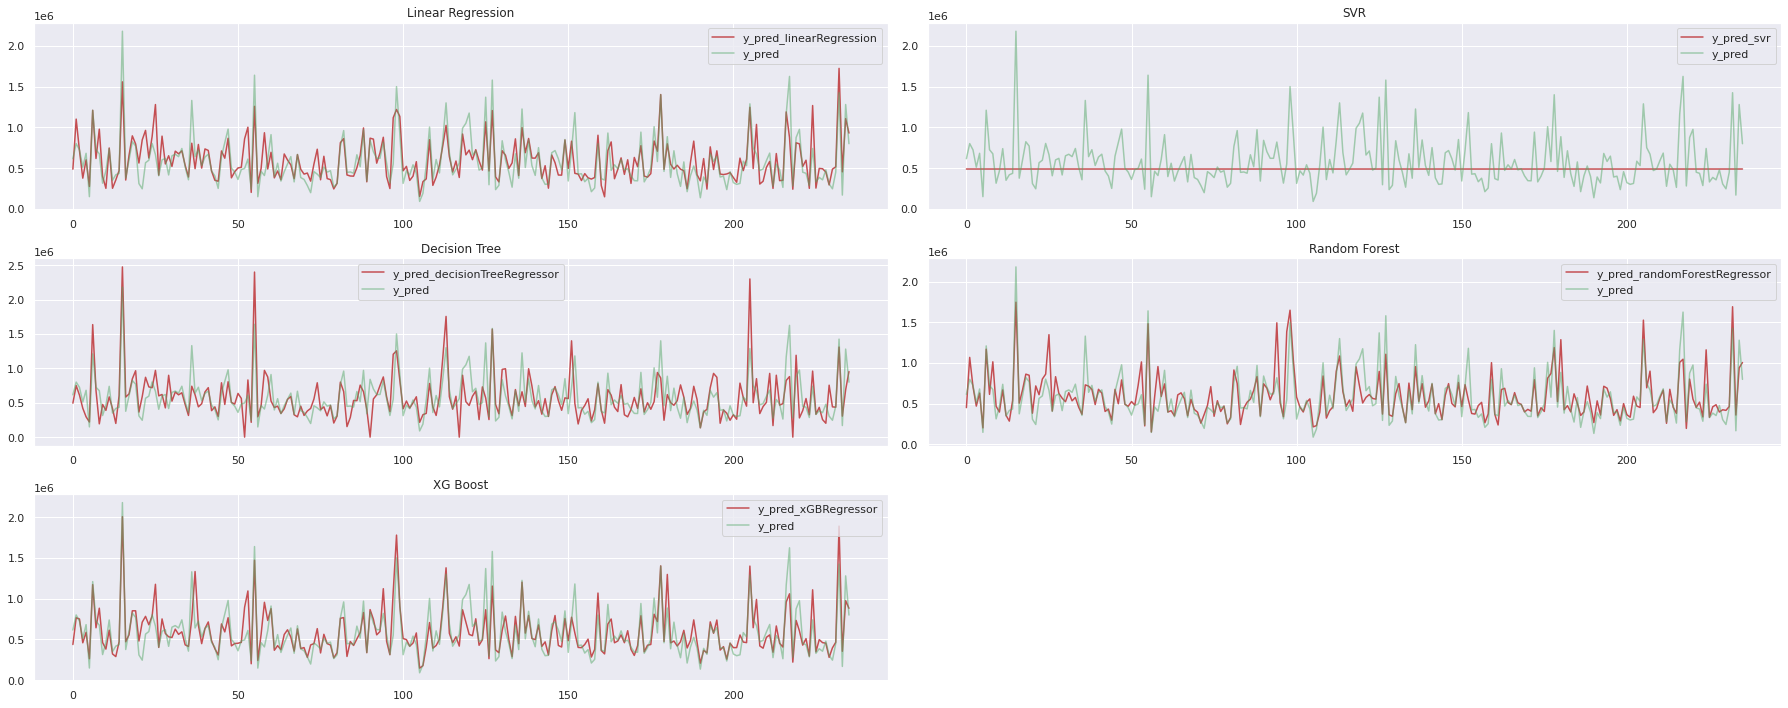

In [1014]:
plt.figure(figsize=(25,10))

plt.subplot(3,2,1)
plt.plot(range(0,len(y_pred_linearRegression)),y_pred_linearRegression,c='r')
plt.plot(range(0,len(y_test)),y_test,c='g',alpha=0.5)
plt.title('Linear Regression')
plt.legend(['y_pred_linearRegression','y_pred'])

plt.subplot(3,2,2)
plt.plot(range(0,len(y_pred_svr)),y_pred_svr,c='r')
plt.plot(range(0,len(y_test)),y_test,c='g',alpha=0.5)
plt.title('SVR')
plt.legend(['y_pred_svr','y_pred'])

plt.subplot(3,2,3)
plt.plot(range(0,len(y_pred_decisionTreeRegressor)),y_pred_decisionTreeRegressor,c='r')
plt.plot(range(0,len(y_test)),y_test,c='g',alpha=0.5)
plt.title('Decision Tree')
plt.legend(['y_pred_decisionTreeRegressor','y_pred'])

plt.subplot(3,2,4)
plt.plot(range(0,len(y_pred_randomForestRegressor)),y_pred_randomForestRegressor,c='r')
plt.plot(range(0,len(y_test)),y_test,c='g',alpha=0.5)
plt.title('Random Forest')
plt.legend(['y_pred_randomForestRegressor','y_pred'])

plt.subplot(3,2,5)
plt.plot(range(0,len(y_pred_xGBRegressor)),y_pred_xGBRegressor,c='r')
plt.plot(range(0,len(y_test)),y_test,c='g',alpha=0.5)
plt.title('XG Boost')
plt.legend(['y_pred_xGBRegressor','y_pred'])

plt.tight_layout()

Part C

In [1015]:
from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras import Sequential

In [1016]:
model = Sequential()

In [1017]:
model.add(Dense(32, activation='relu',kernel_initializer='he_normal', input_shape=[X_train.shape[1]]))
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))

# output layer
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train_scale, y_train, validation_split=0.2, epochs=1000)

Epoch 1/1000
34/34 [==============================] - 1s 10ms/step - loss: 753807996635.4286 - mae: 581012.1321 - val_loss: 443129233408.0000 - val_mae: 585019.3750
Epoch 2/1000
34/34 [==============================] - 0s 4ms/step - loss: 495254355031.7714 - mae: 572958.5607 - val_loss: 440423940096.0000 - val_mae: 582984.0000
Epoch 3/1000
34/34 [==============================] - 0s 4ms/step - loss: 1091537989983.0857 - mae: 625454.0393 - val_loss: 422239764480.0000 - val_mae: 569302.6875
Epoch 4/1000
34/34 [==============================] - 0s 4ms/step - loss: 729040012668.3429 - mae: 555387.1125 - val_loss: 347471773696.0000 - val_mae: 509683.8750
Epoch 5/1000
34/34 [==============================] - 0s 4ms/step - loss: 357307839751.3143 - mae: 459212.4536 - val_loss: 182447030272.0000 - val_mae: 340160.5625
Epoch 6/1000
34/34 [==============================] - 0s 4ms/step - loss: 288696197354.0571 - mae: 296243.6665 - val_loss: 88667987968.0000 - val_mae: 198221.1719
Epoch 7/1000
34

In [1018]:
model.evaluate(X_test_scale, y_test)
model.summary()

8/8 [==============================] - 0s 2ms/step - loss: 141095731200.0000 - mae: 176803.3281
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_35 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_36 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 129       
Total params: 37,665
Trainable params: 37,665
Non-trainable params: 0
_________________________________________________________________


In [1019]:
y_pred_ann = model.predict(X_test_scale)

In [1020]:
rscore_ann = r2_score(y_test,y_pred_ann)
print('R2 ANN: {}'.format(rscore_ann))

R2 ANN: -0.4912954992342109


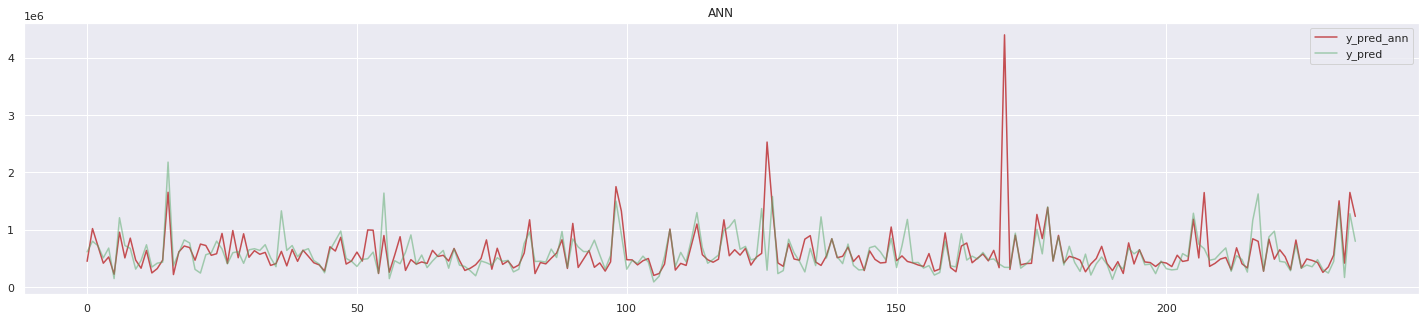

In [1021]:
plt.figure(figsize=(25,5))

plt.plot(range(0,len(y_pred_ann)),y_pred_ann,c='r')
plt.plot(range(0,len(y_test)),y_test,c='g',alpha=0.5)
plt.title('ANN')
plt.legend(['y_pred_ann','y_pred'])
plt.show()

Well sometimes machine learning models can work better than deep learning model, unless I would be doing anything wrong.